Team Members details 

Member 1 
name : Pavana Lakshmi Venugopal
ubit name : pavanala
UB number : 50464513

Member 2 
name : Varshitha Krishna Reddy
ubit name : vreddy5
UB number : 50471132


# Task 1

In [46]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from termcolor import colored

In [47]:
#Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [48]:
#Normalize the pixel values to [0, 1]
X_train = X_train / 255.
X_test = X_test / 255.

In [49]:
# Reshape the input data to 2D arrays
X_train = tf.reshape(X_train, shape=(X_train.shape[0], -1))
X_test = tf.reshape(X_test, shape=(X_test.shape[0], -1))

In [50]:
# Convert the labels to -1 or 1
y_train = tf.cast((y_train * 2 - 1), dtype=tf.float32)
y_test = tf.cast((y_test * 2 - 1), dtype=tf.float32)

In [51]:
# SVM
class SVM(tf.keras.Model):
    def __init__(self):
        super(SVM, self).__init__()
        self.W = tf.Variable(tf.zeros(shape=(X_train.shape[1], 1)))
        self.b = tf.Variable(tf.zeros(shape=()))
        
    def call(self, inputs):
        return tf.reshape(tf.matmul(inputs, self.W) + self.b, [-1])

# Define the loss function

In [52]:

@tf.function
def hinge_loss(y_true, y_pred):
    return tf.reduce_mean(tf.maximum(0., 1. - y_true * y_pred))

In [53]:
# Define the optimizers
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
    # Use the optimizer for training and evaluation

In [54]:
# Train the SVM model
svm = SVM()
num_epochs = 10
batch_size = 100
num_batches = int(X_train.shape[0] / batch_size)

for epoch in range(num_epochs):
    for i in range(num_batches):
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        y_batch = y_train[i*batch_size:(i+1)*batch_size]
        
        with tf.GradientTape() as tape:
            y_pred = svm(X_batch)
            loss = hinge_loss(y_batch, y_pred)
            
        gradients = tape.gradient(loss, svm.trainable_variables)
        optimizer.apply_gradients(zip(gradients, svm.trainable_variables))
    
    y_pred_train = svm(X_train)
    train_loss = hinge_loss(y_train, y_pred_train)
    train_acc = tf.reduce_mean(tf.cast(tf.equal(tf.sign(y_pred_train), y_train), dtype=tf.float32))
    
    y_pred_test = svm(X_test)
    test_loss = hinge_loss(y_test, y_pred_test)
    test_acc = tf.reduce_mean(tf.cast(tf.equal(tf.sign(y_pred_test), y_test), dtype=tf.float32))
    
    # Print the epoch results in color
    print(colored(f"Epoch {epoch + 1}: Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}", 'green'))

Epoch 1: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 2: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 3: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 4: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 5: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 6: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 7: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 8: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 9: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 10: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135


In [55]:
# Plot the cures of training/validation loss/accuracy vs. epochs of different tensorflow optimizers and mini-batch sizes.

Epoch 1: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 2: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 3: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 4: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 5: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 6: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 7: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 8: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 9: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135
Epoch 10: Train Loss: 0.0000, Train Accuracy: 0.1124, Test Loss: 0.0000, Test Accuracy: 0.1135


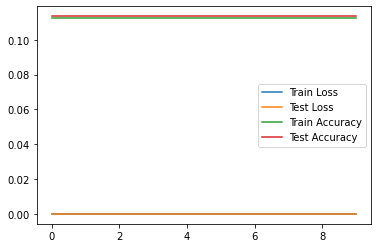

In [56]:
import matplotlib.pyplot as plt

svm = SVM()
num_epochs = 10
batch_size = 100
num_batches = int(X_train.shape[0] / batch_size)

train_losses, train_accs, test_losses, test_accs = [], [], [], []
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
for epoch in range(num_epochs):
    for i in range(num_batches):
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        y_batch = y_train[i*batch_size:(i+1)*batch_size]
        
        with tf.GradientTape() as tape:
            y_pred = svm(X_batch)
            loss = hinge_loss(y_batch, y_pred)
            
        gradients = tape.gradient(loss, svm.trainable_variables)
        optimizer.apply_gradients(zip(gradients, svm.trainable_variables))
    
    y_pred_train = svm(X_train)
    train_loss = hinge_loss(y_train, y_pred_train)
    train_acc = tf.reduce_mean(tf.cast(tf.equal(tf.sign(y_pred_train), y_train), dtype=tf.float32))
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    y_pred_test = svm(X_test)
    test_loss = hinge_loss(y_test, y_pred_test)
    test_acc = tf.reduce_mean(tf.cast(tf.equal(tf.sign(y_pred_test), y_test), dtype=tf.float32))
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    
    # Print the epoch results in color
    print(colored(f"Epoch {epoch + 1}: Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}", 'green'))

# Plot the loss and accuracy curves
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.plot(train_accs, label='Train Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.legend()
plt.show()


# Task 2

# One against all implementation

In [11]:
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sb

In [12]:

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# function to normalize the images
def norm(image, label):
    image = tf.cast(image, tf.float32) / 255.0

    return image, label

batch_size = 32
num_epochs = 10

train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.map(norm)
train_ds = train_ds.shuffle(buffer_size=10000)
train_ds = train_ds.batch(batch_size)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_ds = test_ds.map(norm)
test_ds = test_ds.batch(batch_size)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

In [13]:
# SVM Model
class SVM(tf.keras.Model):
    def __init__(self):
        super(SVM, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense = tf.keras.layers.Dense(units=10)

    def call(self, inputs):
        x = self.flatten(inputs)
        logits = self.dense(x)
        return logits

# loss function
def svm_loss(model, x, y):
    logits = model(x)
    regularization_loss = tf.math.reduce_sum(model.losses)
    cross_entropy_loss = tf.compat.v1.losses.sparse_softmax_cross_entropy(labels=(tf.cast(y, tf.int32)), logits=logits)
    svm_loss = regularization_loss + cross_entropy_loss
    return svm_loss

# optimizer
optimizer = tf.keras.optimizers.Adam()

# Define the metrics
train_loss_metric = tf.keras.metrics.Mean()
train_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy()
test_loss_metric = tf.keras.metrics.Mean()
test_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy()

# Train
svm_model = SVM()
for epoch in range(num_epochs):
    
    for step, (x, y) in enumerate(train_ds):
        with tf.GradientTape() as tape:
            loss = svm_loss(svm_model, x, y)
        gradients = tape.gradient(loss, svm_model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, svm_model.trainable_variables))

        train_loss_metric(loss)
        train_accuracy_metric(y, svm_model(x))

    
    for step, (x, y) in enumerate(test_ds):
        loss = svm_loss(svm_model, x, y)

        test_loss_metric(loss)
        test_accuracy_metric(y, svm_model(x))

    # Print the results for this epoch
    template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
    print(template.format(epoch+1,
                          train_loss_metric.result(),
                          train_accuracy_metric.result()*100,
                          test_loss_metric.result(),
                          test_accuracy_metric.result()*100))

    # Reset the metrics for the next epoch
    train_loss_metric.reset_states()
    train_accuracy_metric.reset_states()
    test_loss_metric.reset_states()
    test_accuracy_metric.reset_states()

Epoch 1, Loss: 0.46513840556144714, Accuracy: 88.10333251953125, Test Loss: 0.30614903569221497, Test Accuracy: 91.27999877929688
Epoch 2, Loss: 0.30338242650032043, Accuracy: 91.6933364868164, Test Loss: 0.28207632899284363, Test Accuracy: 91.93000030517578
Epoch 3, Loss: 0.2826694846153259, Accuracy: 92.18500518798828, Test Loss: 0.2742941379547119, Test Accuracy: 92.18000030517578
Epoch 4, Loss: 0.2730916142463684, Accuracy: 92.47000122070312, Test Loss: 0.26986074447631836, Test Accuracy: 92.3699951171875
Epoch 5, Loss: 0.2662259638309479, Accuracy: 92.71833038330078, Test Loss: 0.2667440176010132, Test Accuracy: 92.5199966430664
Epoch 6, Loss: 0.26190969347953796, Accuracy: 92.84500122070312, Test Loss: 0.2687990665435791, Test Accuracy: 92.40999603271484
Epoch 7, Loss: 0.25843188166618347, Accuracy: 92.92666625976562, Test Loss: 0.2674218416213989, Test Accuracy: 92.43000030517578
Epoch 8, Loss: 0.2553291916847229, Accuracy: 93.038330078125, Test Loss: 0.26955446600914, Test Accu

In [14]:
test_images = test_images.reshape(10000, 784).astype('float32') / 255

In [15]:
pred = svm_model.predict(test_images)
pred_c = tf.argmax(pred, axis=1)

313/313 [==============================] - 0s 780us/step


In [16]:
confusion_matrix = tf.math.confusion_matrix(test_labels, pred_c)

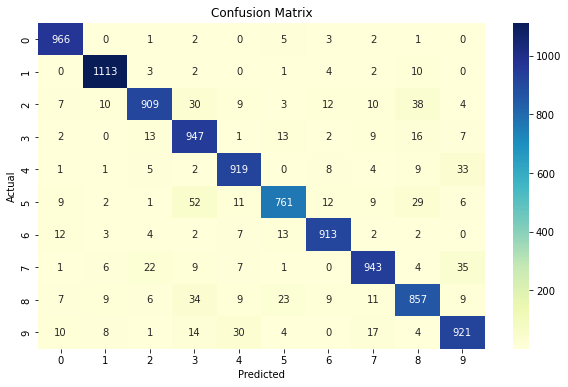

In [17]:
plt.subplots(figsize=(10, 6))
sb.heatmap(confusion_matrix ,annot = True, fmt = 'g',cmap="YlGnBu",vmin=0.2,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
import numpy as np
correct_imgs = {key: [] for key in np.unique(test_labels)}
incorrect_img = {key: [] for key in np.unique(test_labels)}
for i in range(len(test_labels)):
    if (pred_c.numpy()[i] == test_labels[i]) and (len(correct_imgs[test_labels[i]]) < 5) :
        correct_imgs[test_labels[i]].append(i)
    if (pred_c.numpy()[i] != test_labels[i]) and (len(incorrect_img[test_labels[i]]) < 5):
        incorrect_img[test_labels[i]].append(i)

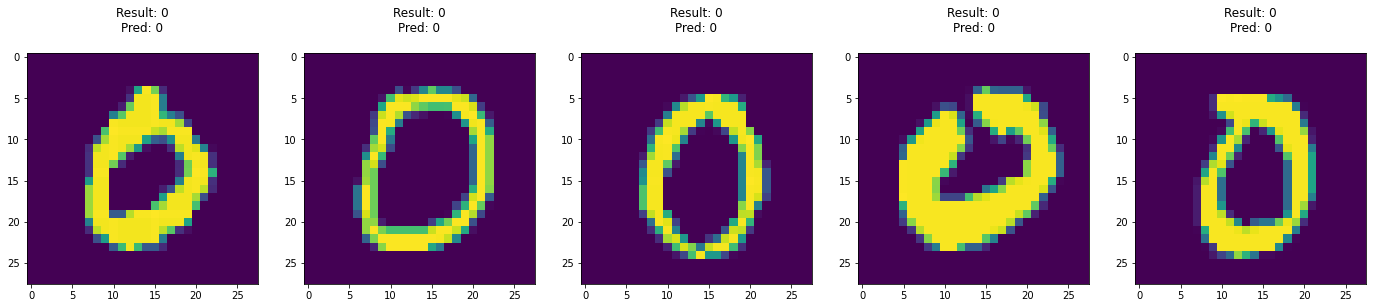

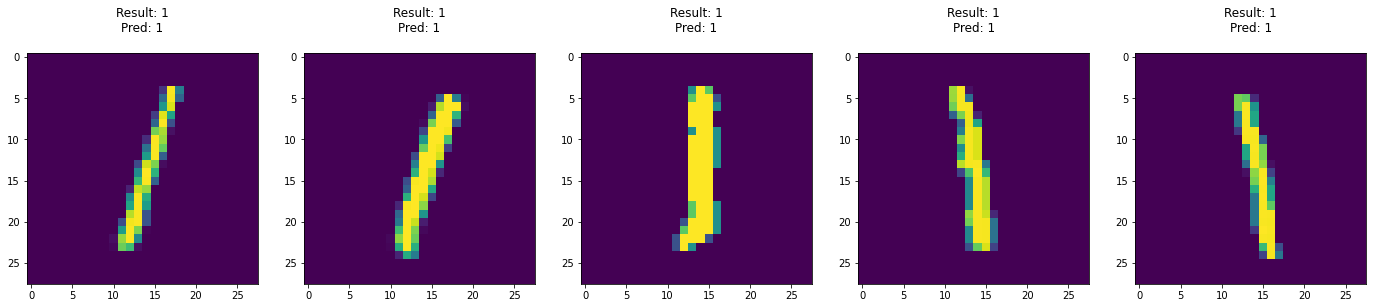

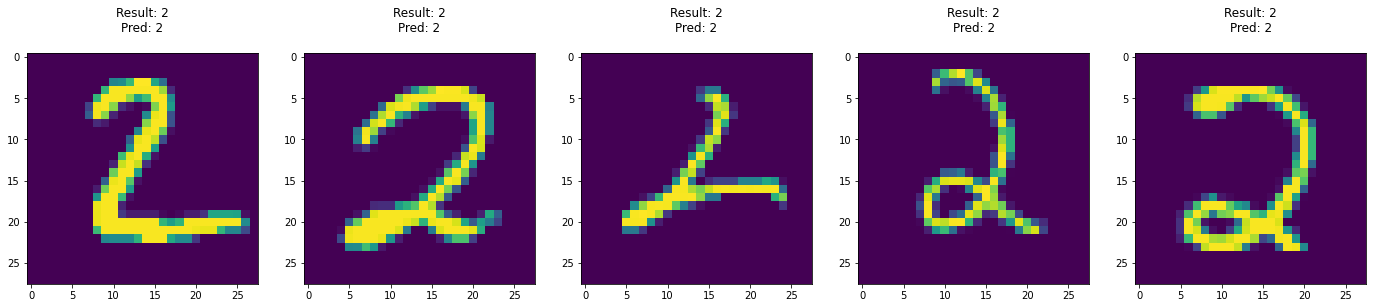

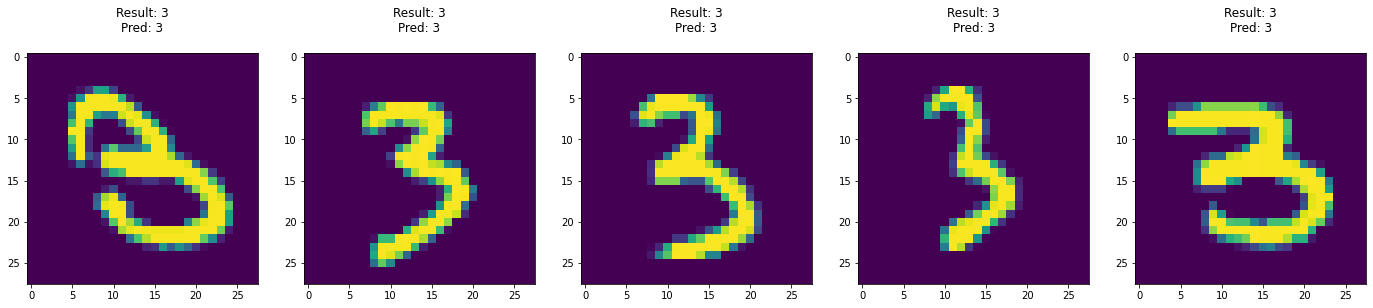

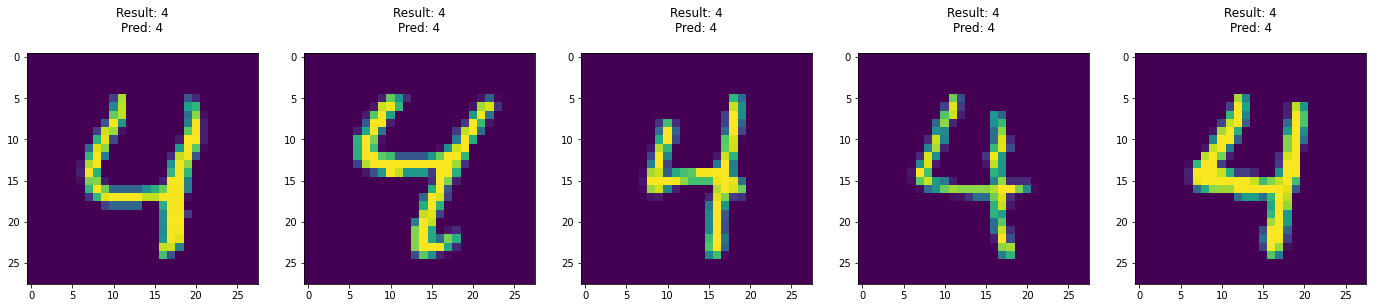

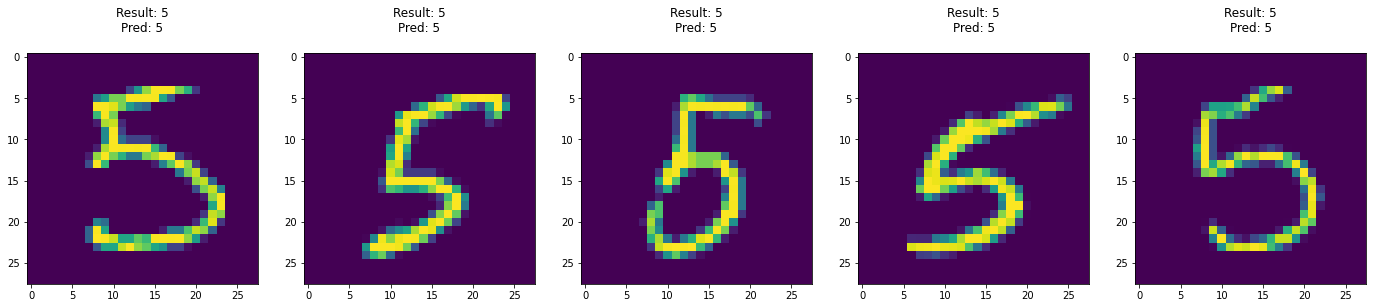

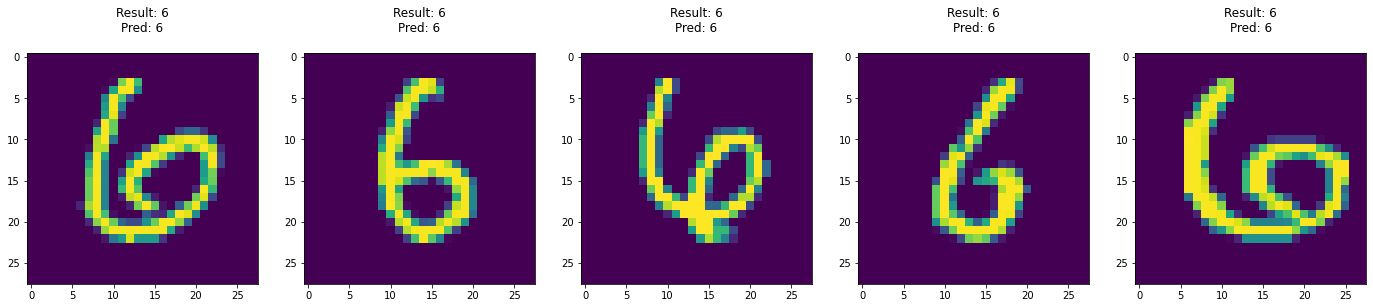

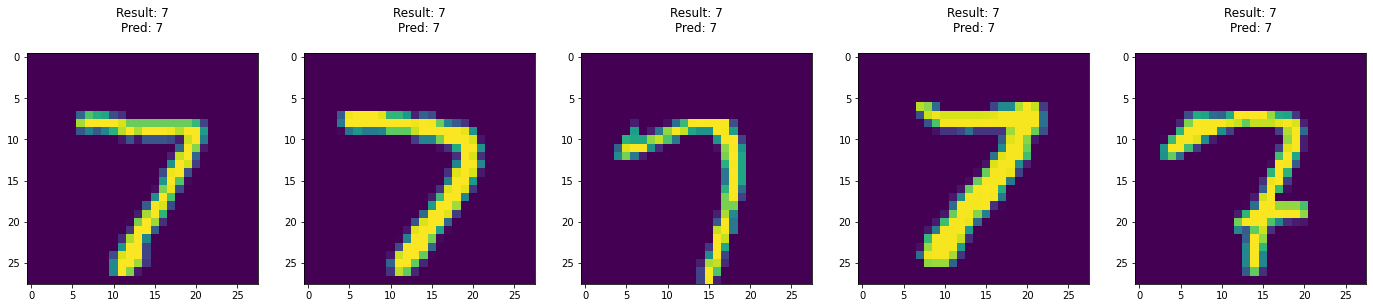

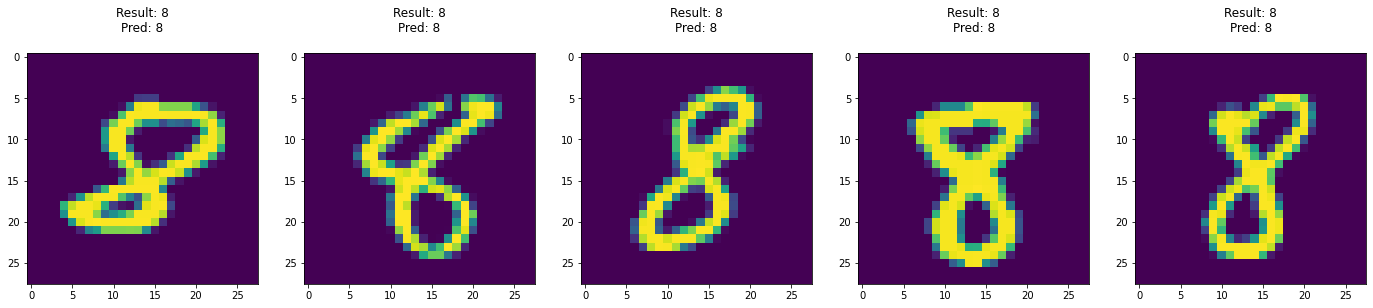

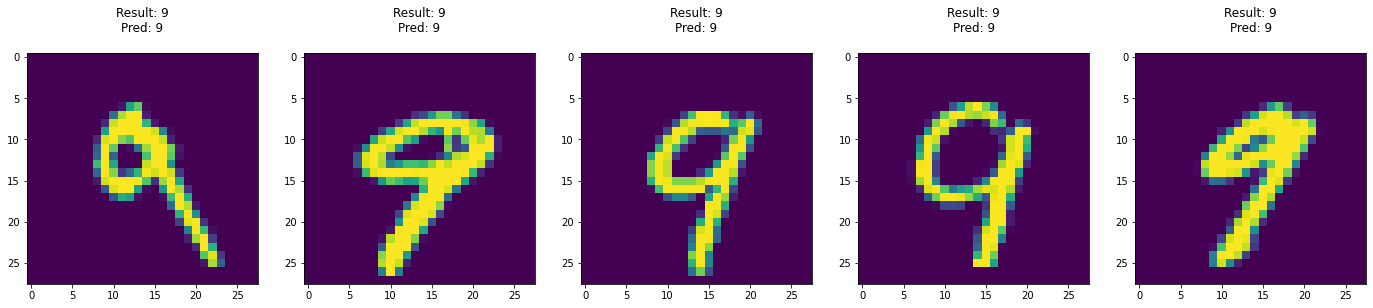

In [19]:
for i in range(10):
    plt.subplots(1,5, figsize=(24,10))
    for j in range(5):
        l1 = plt.subplot(1, 5, j + 1)
        l1.set_title('Result: {}\nPred: {}\n'.format(i, pred_c.numpy()[correct_imgs[i][j]]))
        l1.imshow(test_images[correct_imgs[i][j]].reshape(28,28))

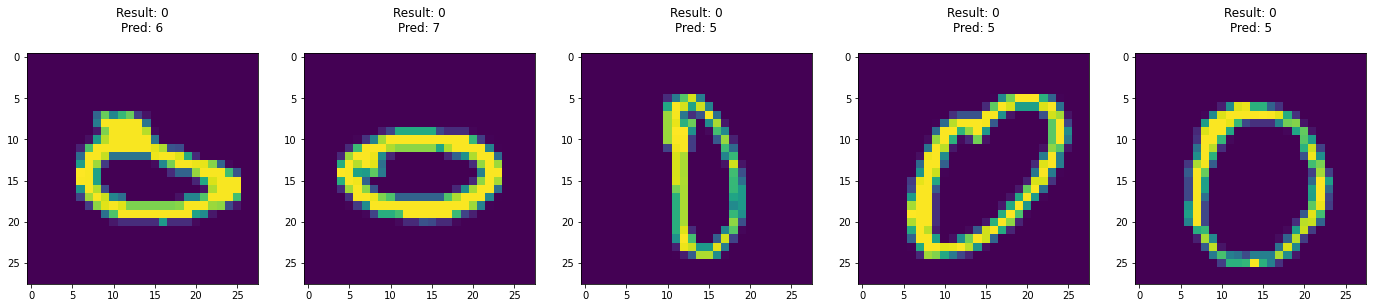

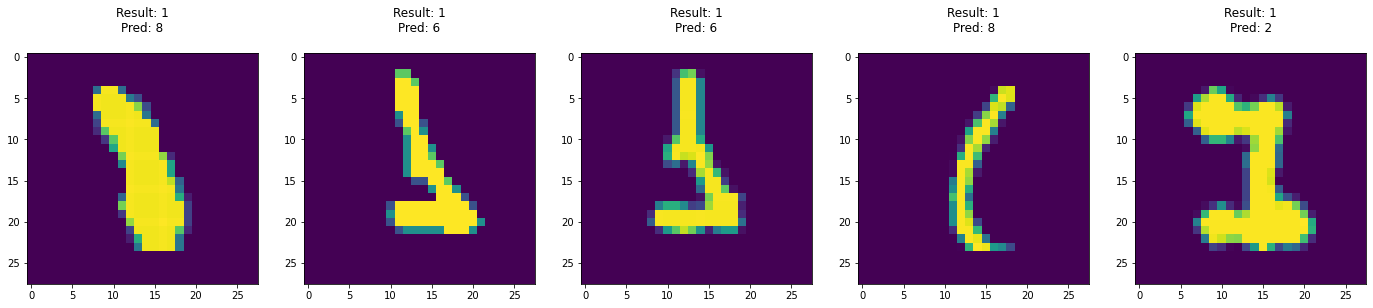

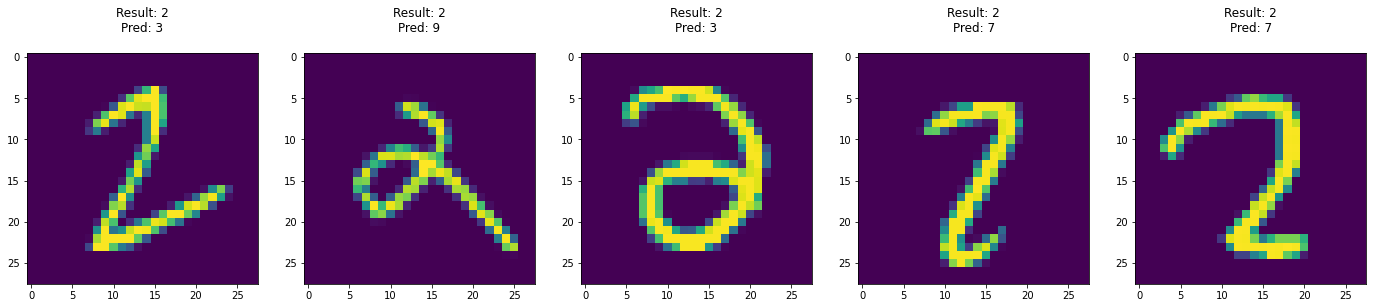

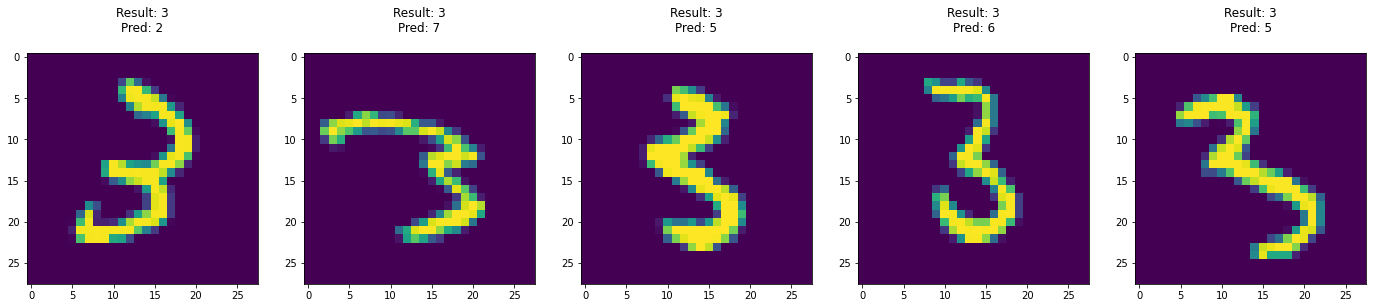

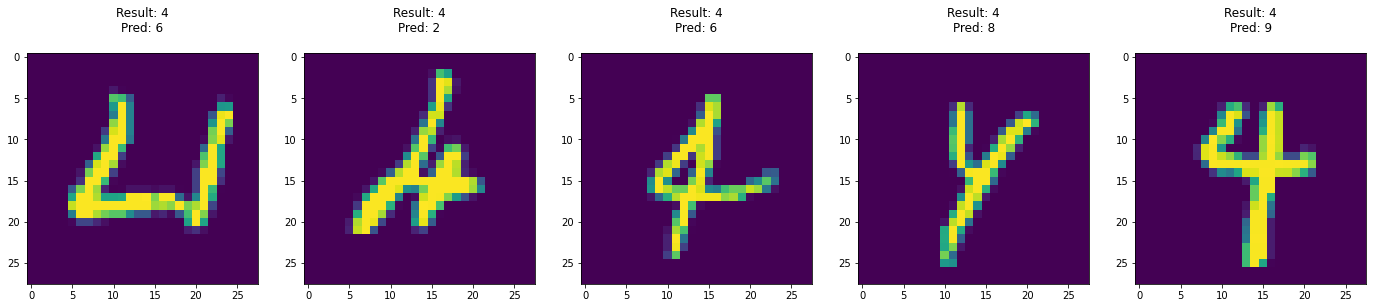

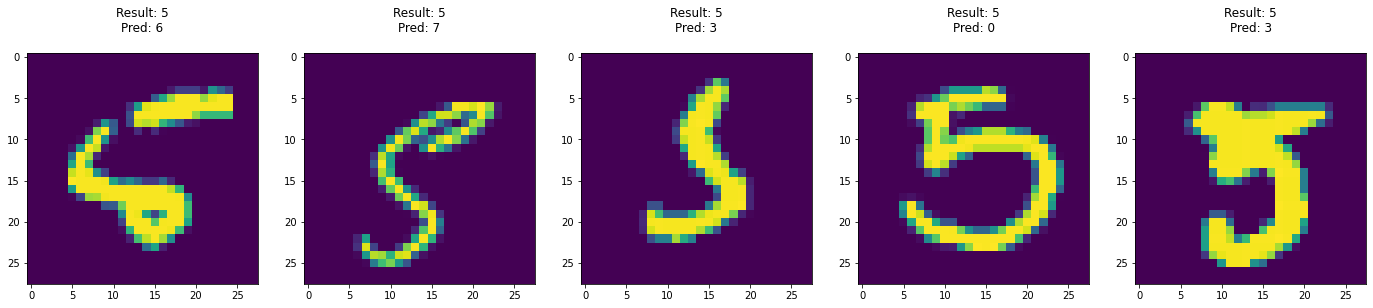

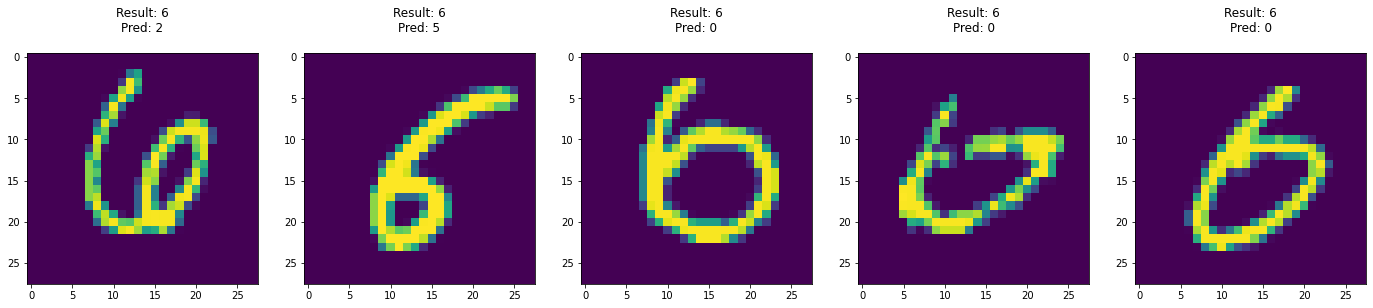

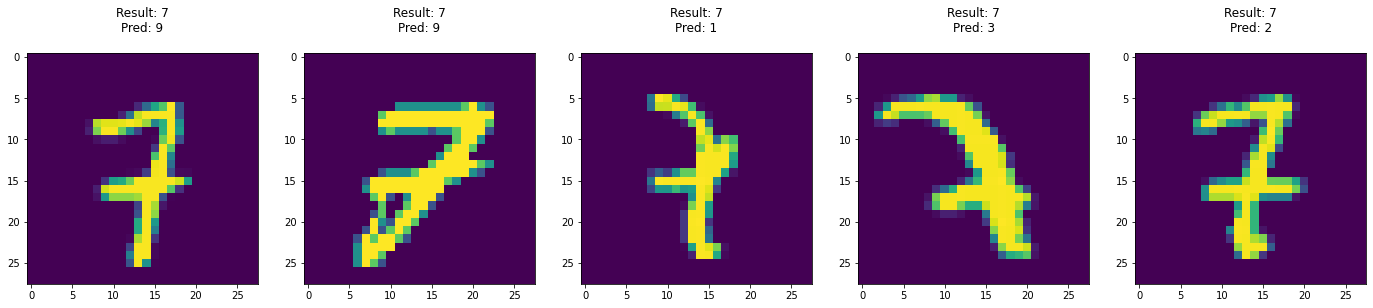

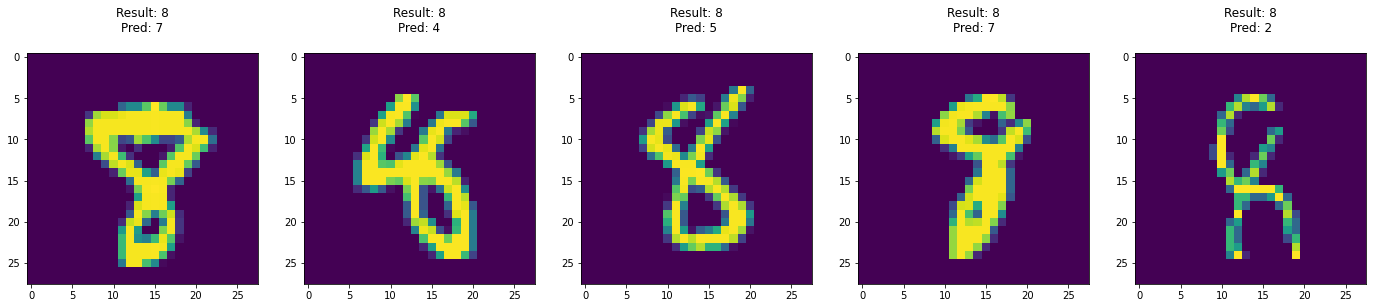

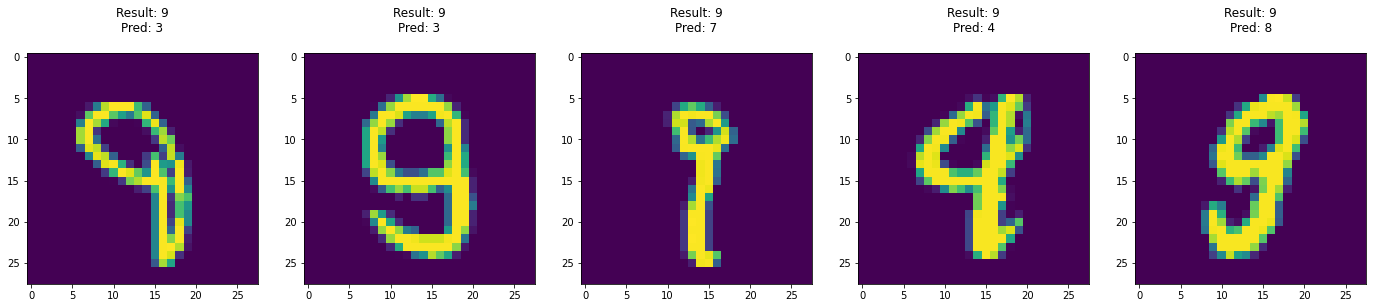

In [20]:
for i in range(10):
    plt.subplots(1,5, figsize=(24,10))
    for j in range(5):
        l1 = plt.subplot(1, 5, j + 1)
        l1.set_title('Result: {}\nPred: {}\n'.format(i, pred_c.numpy()[incorrect_img[i][j]]))
        l1.imshow(test_images[incorrect_img[i][j]].reshape(28,28))

# One against one approach


In [32]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop

In [33]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [34]:
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [35]:
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

In [36]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model.fit(x_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test_cat))

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2442 - accuracy: 0.9241 - val_loss: 0.1256 - val_accuracy: 0.9617
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1004 - accuracy: 0.9689 - val_loss: 0.0837 - val_accuracy: 0.9751
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0733 - accuracy: 0.9778 - val_loss: 0.0719 - val_accuracy: 0.9775
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.0823 - val_accuracy: 0.9782
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0512 - accuracy: 0.9845 - val_loss: 0.0773 - val_accuracy: 0.9798
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0427 - accuracy: 0.9875 - val_loss: 0.0695 - val_accuracy: 0.9834
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0380 - accuracy: 0.9890 - val_loss: 0.0745 - val_accuracy: 0.9834

In [38]:
score = model.evaluate(x_test, y_test_cat, verbose=1)
print(score[1]*100)

313/313 [==============================] - 1s 5ms/step - loss: 0.0981 - accuracy: 0.9805
98.04999828338623


In [39]:
pred = model.predict(x_test)
pred_c = tf.argmax(pred, axis=1)

313/313 [==============================] - 2s 5ms/step


In [40]:
confusion_matrix = tf.math.confusion_matrix(y_test, pred_c)

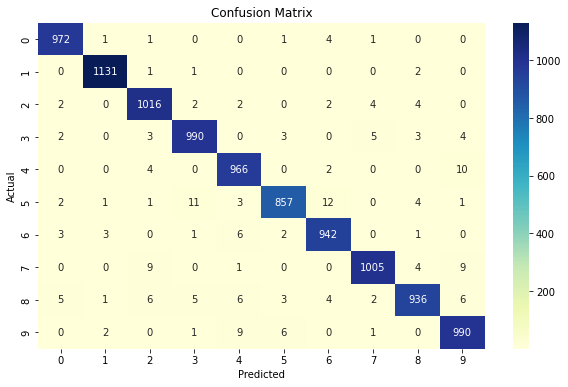

In [41]:
plt.subplots(figsize=(10, 6))
sb.heatmap(confusion_matrix ,annot = True, fmt = 'g',cmap="YlGnBu",vmin=0.2,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [42]:
import numpy as np
correct_imgs = {key: [] for key in np.unique(test_labels)}
incorrect_img = {key: [] for key in np.unique(test_labels)}
for i in range(len(test_labels)):
    if (pred_c.numpy()[i] == test_labels[i]) and (len(correct_imgs[test_labels[i]]) < 5) :
        correct_imgs[test_labels[i]].append(i)
    if (pred_c.numpy()[i] != test_labels[i]) and (len(incorrect_img[test_labels[i]]) < 5):
        incorrect_img[test_labels[i]].append(i)

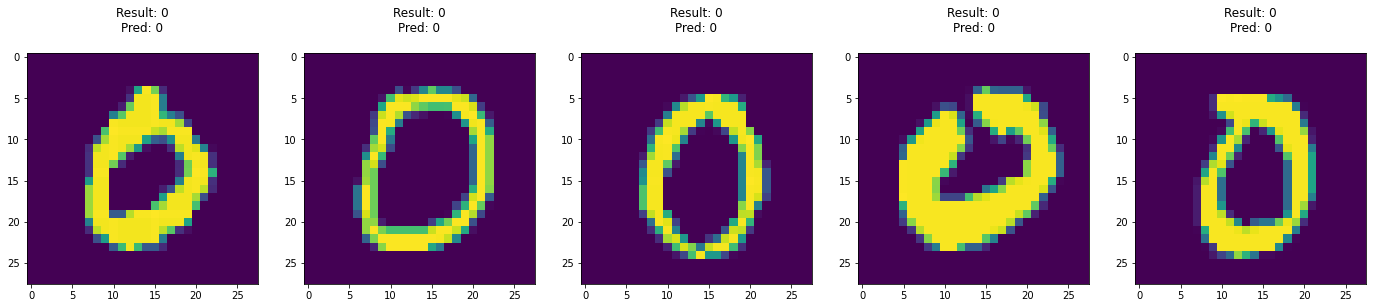

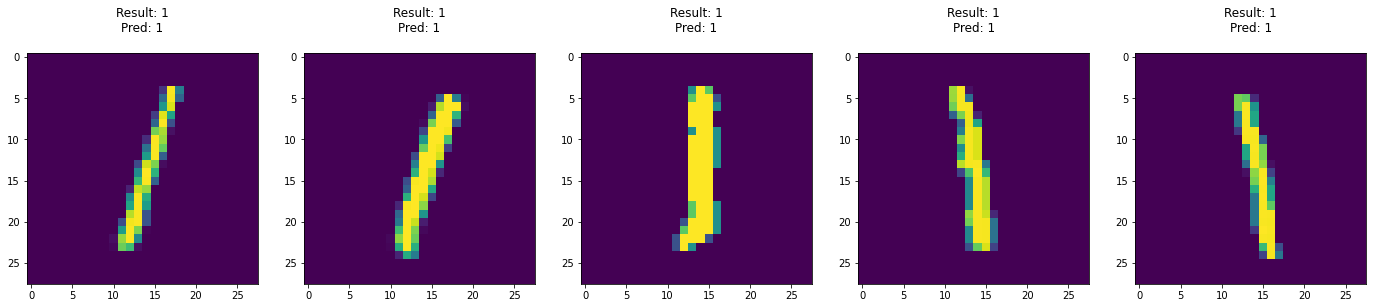

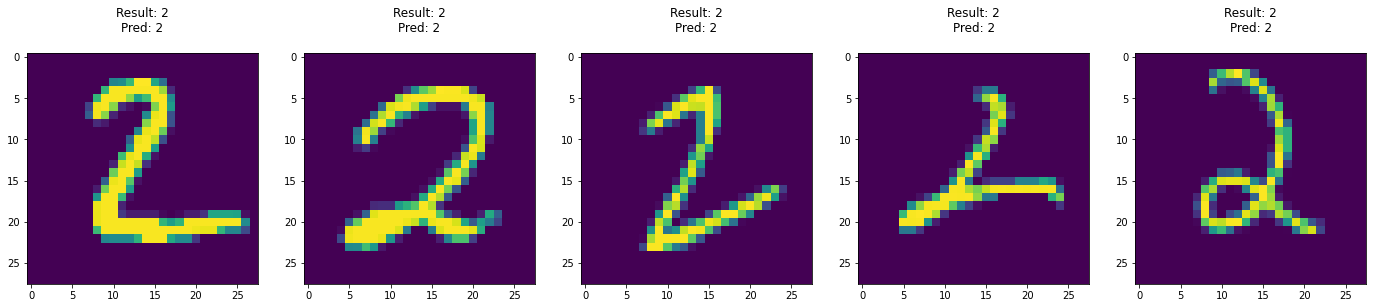

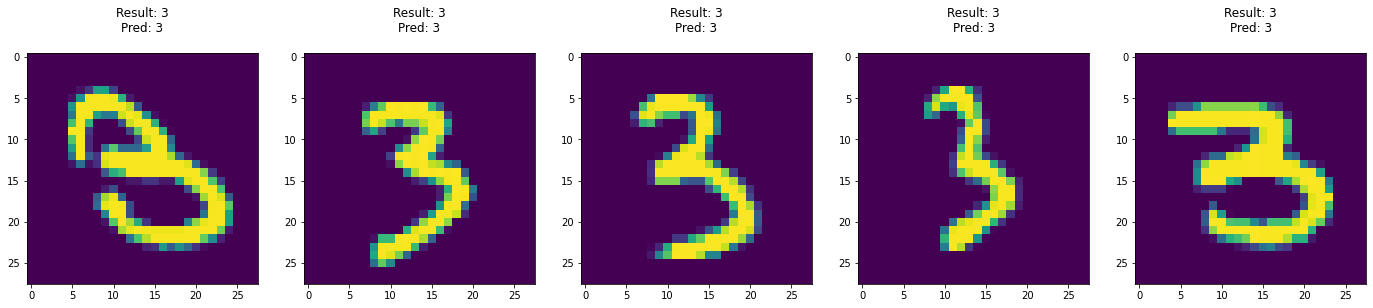

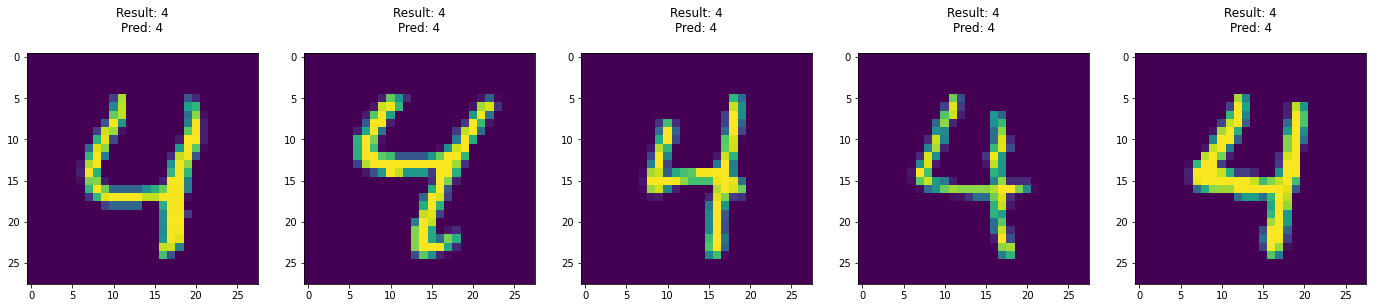

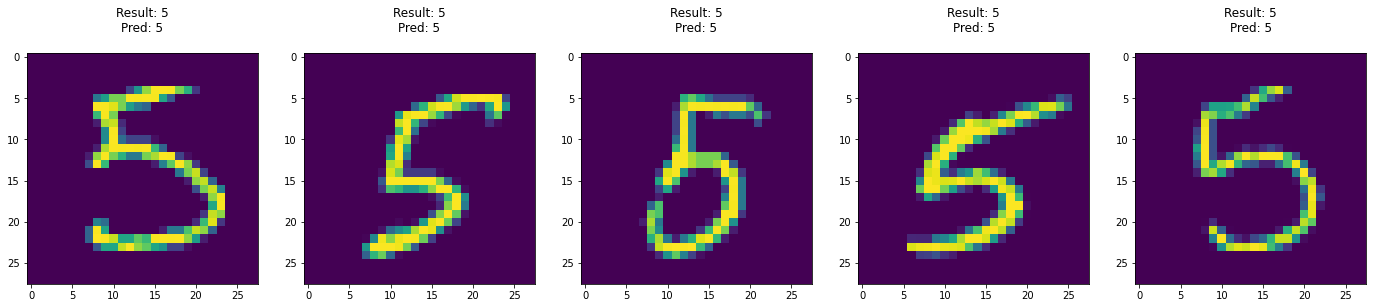

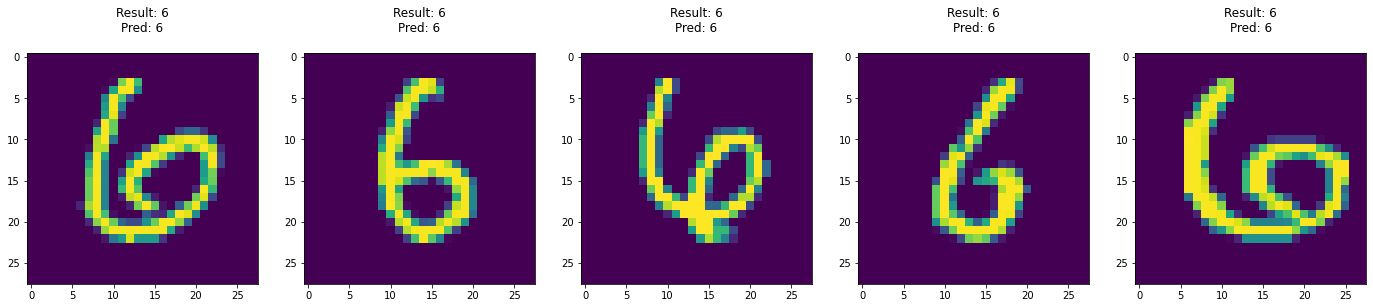

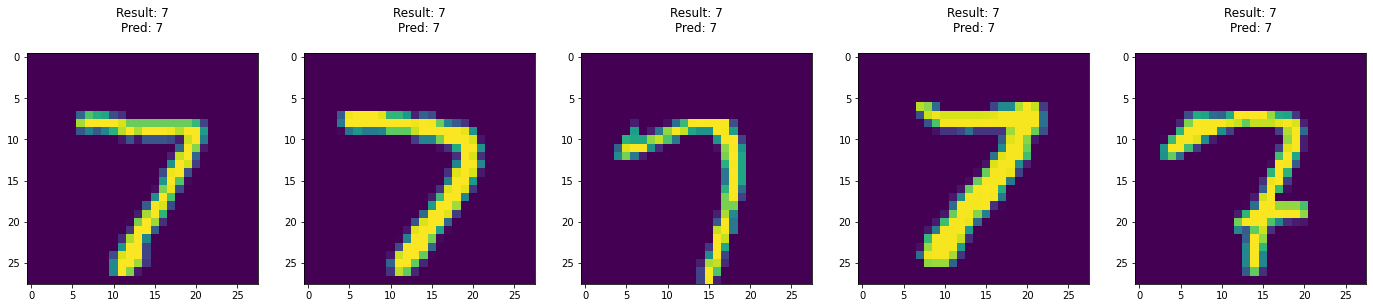

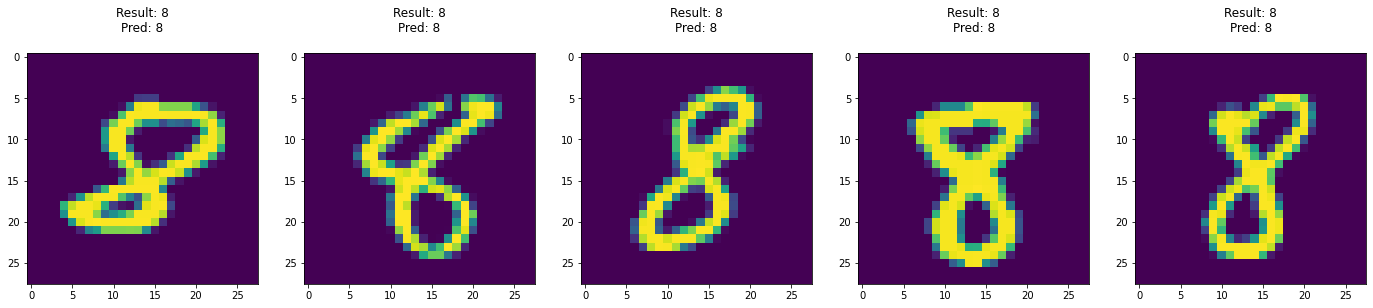

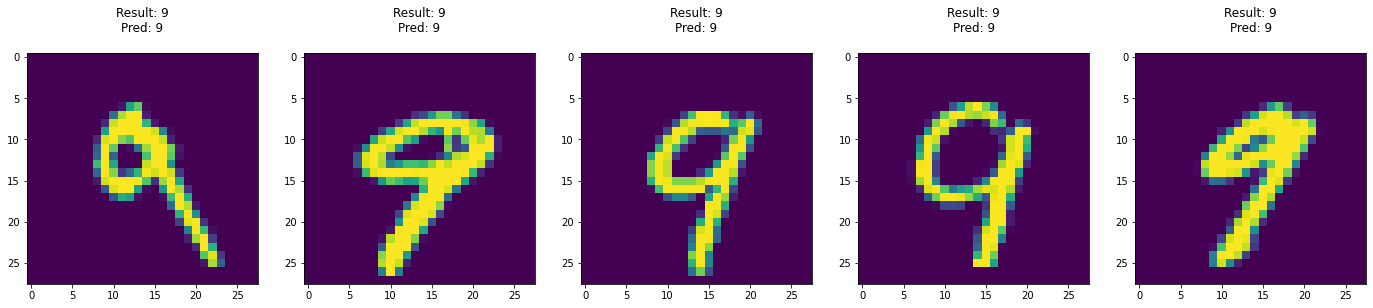

In [43]:
for i in range(10):
    plt.subplots(1,5, figsize=(24,10))
    for j in range(5):
        l1 = plt.subplot(1, 5, j + 1)
        l1.set_title('Result: {}\nPred: {}\n'.format(i, pred_c.numpy()[correct_imgs[i][j]]))
        l1.imshow(test_images[correct_imgs[i][j]].reshape(28,28))

IndexError: list index out of range

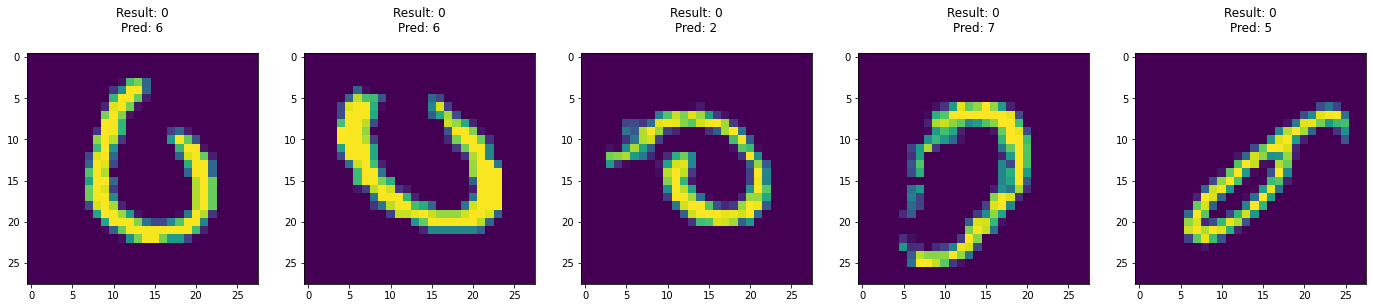

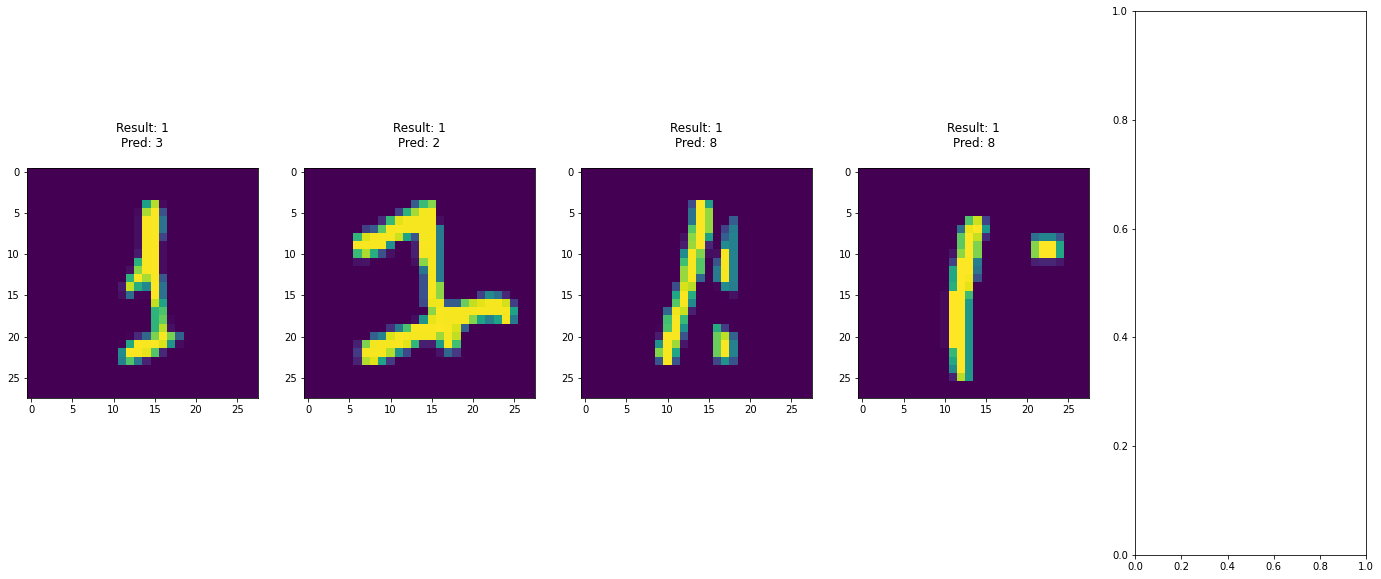

In [44]:
for i in range(10):
    plt.subplots(1,5, figsize=(24,10))
    for j in range(5):
        l1 = plt.subplot(1, 5, j + 1)
        l1.set_title('Result: {}\nPred: {}\n'.format(i, pred_c.numpy()[incorrect_img[i][j]]))
        l1.imshow(test_images[incorrect_img[i][j]].reshape(28,28))

# Overall, One against one approach got us better accuracy with 98.3 % when compared with one against all with ~92%